<a href="https://colab.research.google.com/github/farazmalik6793430-rgb/Prism-Eye/blob/main/gender_classifier_model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

base_dir = '/content/drive/MyDrive/dataset_folder'
train_dir = os.path.join(base_dir, 'train')


In [ ]:
IMG_SIZE = (150,150)
BATCH = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # 20% validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

print("Class indices:", train_gen.class_indices)


Found 4335 images belonging to 2 classes.
Found 1083 images belonging to 2 classes.
Class indices: {'Female Faces': 0, 'Male Faces': 1}


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # sigmoid -> output 0..1 (binary)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 30   # pehle 10 chalao; agar data zyada ho to 20-30 try kar sakte ho
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 642s 5s/step - accuracy: 0.5623 - loss: 0.6933 - val_accuracy: 0.6898 - val_loss: 0.5654
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.7196 - loss: 0.5503 - val_accuracy: 0.7710 - val_loss: 0.5152
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.7530 - loss: 0.5022 - val_accuracy: 0.7959 - val_loss: 0.4272
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.7866 - loss: 0.4480 - val_accuracy: 0.7765 - val_loss: 0.4562
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.8310 - loss: 0.3840 - val_accuracy: 0.8412 - val_loss: 0.3594
Epoch 6/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8352 - loss: 0.3595 - val_accuracy: 0.8246 - val_loss: 0.3737
Epoch 7/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.8536 - loss: 0.3439 - val_accuracy: 0.8615 - val_loss: 0.3128
Epoch 8/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8689 - loss: 0.3170 - val_accu

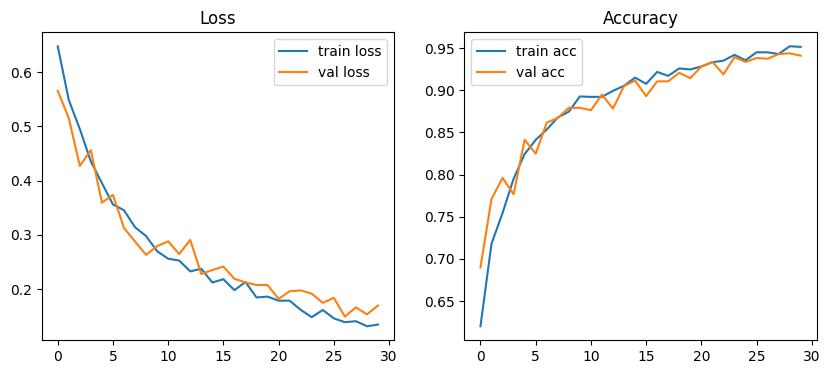

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title('Accuracy')
plt.show()


In [1]:
save_path = '/content/drive/MyDrive/ahmed.h5'
model.save(save_path)
print("Saved model at:", save_path)


NameError: name 'model' is not defined